In [ ]:
import warnings

warnings.simplefilter(action ='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from PIL import Image

import matplotlib.pyplot as plt
import os
import PIL
import shutil
import random
import glob
import itertools

%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"supemaninnutsell","key":"c5586a75cc83f7fff85d04d0dea146e8"}'}

In [ ]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the file to the correct directory
shutil.move("kaggle.json", "/root/.kaggle/")

# Change file permissions to prevent warnings
os.chmod("/root/.kaggle/kaggle.json", 600)


In [6]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0


In [10]:
import os
import glob

# Search for files or directories containing the dataset name
matching_files = glob.glob("**/skin-cancer-mnist-ham10000*", recursive=True)

if matching_files:
    print("Found the following files or directories:")
    for file_path in matching_files:
        print(file_path)
else:
    print("No files or directories found containing 'skin-cancer-mnist-ham10000'")

Found the following files or directories:
skin-cancer-mnist-ham10000.zip


In [11]:
import os
import pandas as pd
import zipfile
import glob

# Search for files or directories containing the dataset name
matching_files = glob.glob("**/skin-cancer-mnist-ham10000*", recursive=True)

if matching_files:
    print("Found the following files or directories:")
    for file_path in matching_files:
        print(file_path)
        if file_path.endswith(".zip"):  # Check if it's a zip file
            dataset_zip_path = file_path
            dataset_folder = file_path[:-4]  # Extract to the same directory

            # Extract the dataset if it hasn't been extracted yet
            if not os.path.exists(dataset_folder):
                with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
                    zip_ref.extractall(os.path.dirname(dataset_zip_path))

            csv_path = os.path.join(dataset_folder, "HAM10000_metadata.csv")

            try:
                meta_data = pd.read_csv(csv_path)
                print("Successfully read CSV file:", csv_path)
                meta_data.head()  # Display the first few rows of the data
                break  # Stop searching after reading the CSV
            except FileNotFoundError:
                print("CSV file not found in the extracted directory.")

else:
    print("No files or directories found containing 'skin-cancer-mnist-ham10000'")

Found the following files or directories:
skin-cancer-mnist-ham10000.zip
CSV file not found in the extracted directory.


In [12]:
import os
import glob

# Search for the specific zip file
matching_files = glob.glob("**/skin-cancer-mnist-ham10000.zip", recursive=True)

if matching_files:
    print("Found 'skin-cancer-mnist-ham10000.zip' at the following location:")
    for file_path in matching_files:
        print(file_path)
else:
    print("File 'skin-cancer-mnist-ham10000.zip' not found.")

Found 'skin-cancer-mnist-ham10000.zip' at the following location:
skin-cancer-mnist-ham10000.zip


In [13]:
import zipfile

with zipfile.ZipFile('skin-cancer-mnist-ham10000.zip', 'r') as zip_ref:
    zip_ref.extractall('.')  # Extracts to the current directory

In [16]:
import pandas as pd
import os

# Assuming the zip file was extracted to the current directory
dataset_folder = ""  # Set to an empty string if the CSV is in the current directory
csv_filename = "HAM10000_metadata.csv"

# Construct the full path to the CSV file
csv_path = os.path.join(os.getcwd(), dataset_folder, csv_filename)

# Print the path to verify its correctness
print("Looking for CSV file at:", csv_path)

# Read the CSV file using pandas
meta_data = pd.read_csv(csv_path)

meta_data.head()  # Display the first few rows of the data

Looking for CSV file at: /content/HAM10000_metadata.csv


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [17]:
print("Unique Cancer types represented in data")
print(meta_data.dx.unique(),"\n")

# Handling categorical data
encoder = LabelEncoder()
meta_data["dx_label"] = encoder.fit_transform(meta_data["dx"])

# Display of labels and their integer encoding
print("Cancer types and their integer encoding")
print(encoder.classes_)
print(encoder.transform(encoder.classes_))

Unique Cancer types represented in data
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec'] 

Cancer types and their integer encoding
['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']
[0 1 2 3 4 5 6]


In [19]:
import pandas as pd
import os

# Assuming the zip file was extracted to the current directory
# The dataset is actually extracted to the current directory, so we need to adjust the path
image_dir_path = os.path.join(os.getcwd(), 'HAM10000_images_part_1')

# Get a list of all files in the directory
files = os.listdir(image_dir_path)

# Filter out only the image files
image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Count the number of image files
num_images = len(image_files)

print("Number of images:", num_images)

Number of images: 5000


In [20]:
import pandas as pd
import os

# Get the current working directory
base_dir = os.getcwd()

# Define the paths to both image folders
image_dir_paths = [
    os.path.join(base_dir, 'HAM10000_images_part_1'),
    os.path.join(base_dir, 'HAM10000_images_part_2')
]

# Initialize a list to store all image files
all_image_files = []

# Iterate through both image folders
for image_dir_path in image_dir_paths:
    # Get a list of files in the current folder
    files = os.listdir(image_dir_path)

    # Filter out only the image files and add them to the list
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    all_image_files.extend(image_files)

# Count the total number of image files
num_images = len(all_image_files)

print("Number of images:", num_images)

Number of images: 10015


In [21]:
# Define training directory
train_dir = "/kaggle/working/training_set"

# Create directory if they do not exist
os.makedirs(train_dir, exist_ok=True)

In [23]:
# Group images by cancer type
cancer_types = meta_data["dx"].unique()

# Define the paths to both image folders
image_dir_paths = [
    os.path.join(os.getcwd(), 'HAM10000_images_part_1'),
    os.path.join(os.getcwd(), 'HAM10000_images_part_2')
]

# Copy images to separated directories based on cancer type
for cancer_type in cancer_types:
    # Create a directory for the current cancer type within the train directory
    cancer_train_dir = os.path.join(train_dir, cancer_type)
    os.makedirs(cancer_train_dir, exist_ok=True)

    # Filter images corresponding to the current cancer type
    images_of_cancer_type = meta_data[meta_data["dx"] == cancer_type]["image_id"].values

    # Copy images to the directory for the current cancer type
    for image_id in images_of_cancer_type:
        image_file = image_id + ".jpg"  # Assuming all image files have '.jpg' extension

        # Search for the image in both image folders
        for image_dir_path in image_dir_paths:
            source_path = os.path.join(image_dir_path, image_file)

            # If the image is found, copy it and break the inner loop
            if os.path.exists(source_path):
                destination_path = os.path.join(cancer_train_dir, image_file)
                shutil.copy(source_path, destination_path)
                break  # Break the inner loop after copying

In [24]:
# Get the list of subdirectories within the train directory
subdirs = [subdir for subdir in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir))]

# Print the subdirectories and count of images in each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(train_dir, subdir)
    num_images = len(os.listdir(subdir_path))
    print(f"Subdirectory: {subdir}, Number of Images: {num_images}")

Subdirectory: nv, Number of Images: 6705
Subdirectory: akiec, Number of Images: 327
Subdirectory: vasc, Number of Images: 142
Subdirectory: df, Number of Images: 115
Subdirectory: bcc, Number of Images: 514
Subdirectory: bkl, Number of Images: 1099
Subdirectory: mel, Number of Images: 1113


**Data Visualization**

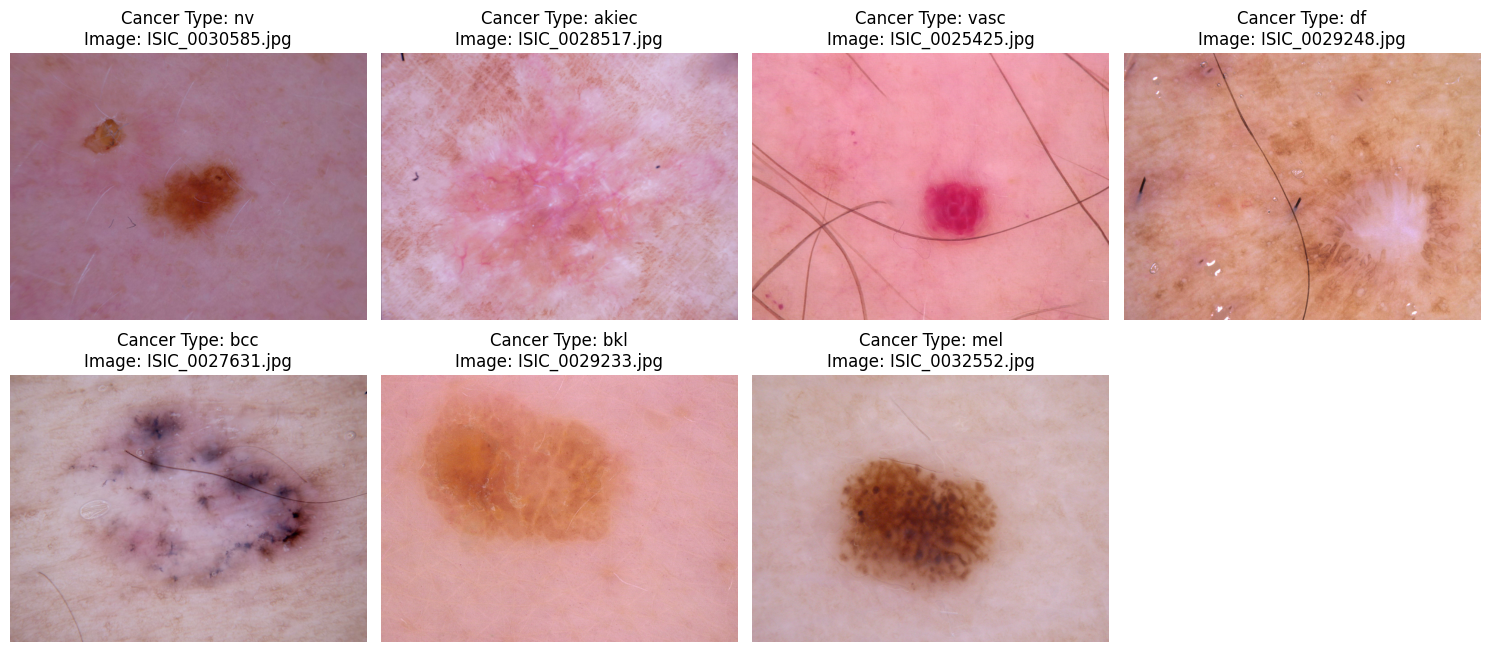

In [25]:
# Create a subplot for each subdirectory
plt.figure(figsize=(15, 10))
for i, subdir in enumerate(subdirs):
    subdir_path = os.path.join(train_dir, subdir)
    # Get the list of image files in the subdirectory
    image_files = [file for file in os.listdir(subdir_path) if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
    # Select the first image from the subdirectory
    if image_files:
        first_image_path = os.path.join(subdir_path, image_files[0])
        image = Image.open(first_image_path)
        # Plot the image
        plt.subplot(3, 4, i+1)  # Adjust the subplot parameters as needed
        plt.imshow(image)
        plt.title(f"Cancer Type: {subdir}\nImage: {image_files[0]}")
        plt.axis('off')

plt.tight_layout()
plt.show()

Data **Preprocessing**

In [26]:
# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)

# Create the train_batches using flow_from_directory
train_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

# Create the test_batches using flow_from_directory
test_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

# Create the valid_batches using flow_from_directory
valid_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

Found 10015 images belonging to 7 classes.
Found 10015 images belonging to 7 classes.
Found 10015 images belonging to 7 classes.


In [27]:
assert train_batches.n == 10015

In [28]:
# Seperate labels with images for training data
imgs, labels = next(train_batches)

Build and Train **CNN**

In [29]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),

    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),

    Flatten(),

    Dense(units=7, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │       1,404,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,424,455 (5.43 MB)

 Trainable params: 1,424,391 (5.43 MB)

 Non-trainable params: 64 (256.00 B)

In [32]:
model.compile(optimizer= Adam(learning_rate = 0.0001),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(
  x=train_batches,
  validation_data=valid_batches,
  epochs=10,
  verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 - 167s - 534ms/step - accuracy: 0.6776 - loss: 1.2451 - val_accuracy: 0.7814 - val_loss: 0.6161
Epoch 2/10
313/313 - 154s - 491ms/step - accuracy: 0.7717 - loss: 0.6267 - val_accuracy: 0.8504 - val_loss: 0.4273
Epoch 3/10
313/313 - 195s - 624ms/step - accuracy: 0.8290 - loss: 0.4807 - val_accuracy: 0.8869 - val_loss: 0.3509
Epoch 4/10
313/313 - 198s - 634ms/step - accuracy: 0.8698 - loss: 0.3793 - val_accuracy: 0.8689 - val_loss: 0.3564
Epoch 5/10
313/313 - 140s - 447ms/step - accuracy: 0.9011 - loss: 0.2897 - val_accuracy: 0.9488 - val_loss: 0.1937
Epoch 6/10
313/313 - 143s - 458ms/step - accuracy: 0.9334 - loss: 0.2112 - val_accuracy: 0.9536 - val_loss: 0.1609
Epoch 7/10
313/313 - 147s - 469ms/step - accuracy: 0.9483 - loss: 0.1675 - val_accuracy: 0.9624 - val_loss: 0.1438
Epoch 8/10
313/313 - 143s - 456ms/step - accuracy: 0.9651 - loss: 0.1228 - val_accuracy: 0.9907 - val_loss: 0.0618
Epoch 9/10
313/313 - 154s - 493ms/step - accuracy: 0.9740 - loss: 0.0893 - val_a

In [34]:
model.save('skin_cancer_classifier.h5')